In [1]:
import imageio

In [2]:
img_arr = imageio.imread("bobby.jpg")

/var/folders/47/z1b86_2x0cxf_y272xj6tnkh0000gn/T/ipykernel_52340/2866903481.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread("bobby.jpg")


In [3]:
img_arr.shape

(337, 600, 3)

In [4]:
batch_size = 3

In [6]:
import torch
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [7]:
batch

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0

In [8]:
import os
data_dir = "image_cats/"
filenames = [name for name in os.listdir(data_dir) 
            if os.path.splitext(name)[-1] == ".png"]

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t

/var/folders/47/z1b86_2x0cxf_y272xj6tnkh0000gn/T/ipykernel_52340/1449363704.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


In [9]:
batch = batch.float()
batch /= 255.0

In [16]:
import imageio

dir_path = "2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(99, 512, 512)

In [17]:
vol = torch.from_numpy(vol_arr).float()
print(vol.shape)
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([99, 512, 512])


torch.Size([1, 99, 512, 512])

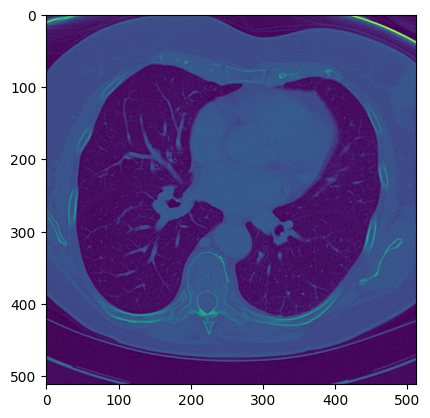

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

In [22]:
# plt.imshow(vol_arr[1110])  # ERROR 

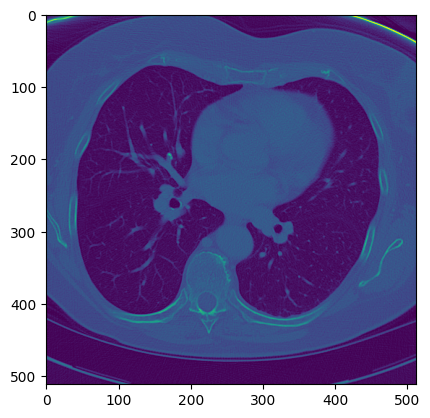

In [20]:
plt.imshow(vol_arr[49])

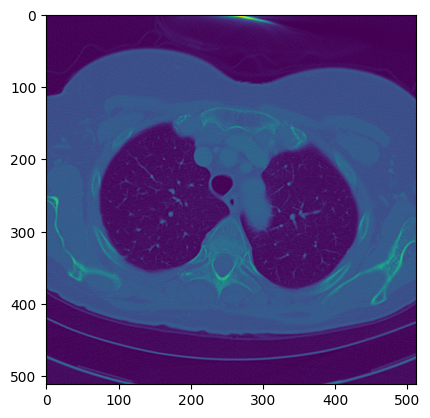

In [21]:
plt.imshow(vol_arr[20])

In [25]:
import csv
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, precision=2, linewidth=75)

wine_path = "winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

In [26]:
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [27]:
col_list = next(csv.reader(open(wine_path), delimiter=";"))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [29]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [30]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
         [ 6.30,  0.30,  ...,  0.49,  9.50],
         ...,
         [ 5.50,  0.29,  ...,  0.38, 12.80],
         [ 6.00,  0.21,  ...,  0.32, 11.80]]),
 torch.Size([4898, 11]))

In [31]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [32]:
# method one:
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

In [34]:
target.shape[0]

4898

In [33]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [35]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.85e+00, 2.78e-01, 3.34e-01, 6.39e+00, 4.58e-02, 3.53e+01,
        1.38e+02, 9.94e-01, 3.19e+00, 4.90e-01, 1.05e+01])

In [37]:
data_var = torch.var(data, dim=0)
data_mean

tensor([6.85e+00, 2.78e-01, 3.34e-01, 6.39e+00, 4.58e-02, 3.53e+01,
        1.38e+02, 9.94e-01, 3.19e+00, 4.90e-01, 1.05e+01])

In [38]:
data_normalised = (data - data_mean) / torch.sqrt(data_var)
data_normalised

tensor([[ 1.72e-01, -8.18e-02,  ..., -3.49e-01, -1.39e+00],
        [-6.57e-01,  2.16e-01,  ...,  1.34e-03, -8.24e-01],
        ...,
        [-1.61e+00,  1.17e-01,  ..., -9.63e-01,  1.86e+00],
        [-1.01e+00, -6.77e-01,  ..., -1.49e+00,  1.04e+00]])

In [39]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [40]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [41]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print("{:2} {:20} {:6.2f} {:6.2f} {:6.2f}".format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [42]:
total_sulfur_dioxide = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_dioxide)
predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [43]:
actual_indexes = target > 5
actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [44]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches/n_predicted, n_matches/n_actual

(2018, 0.74000733406674, 0.6193984039287906)

In [45]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

In [46]:
bikes_numpy = np.loadtxt(
    "hour-fixed.csv", 
    dtype=np.float32, 
    delimiter=",", 
    skiprows=1, 
    converters={1: lambda x: float(x[8:10])}) # <1>
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.00e+00, 1.00e+00,  ..., 1.30e+01, 1.60e+01],
        [2.00e+00, 1.00e+00,  ..., 3.20e+01, 4.00e+01],
        ...,
        [1.74e+04, 3.10e+01,  ..., 4.80e+01, 6.10e+01],
        [1.74e+04, 3.10e+01,  ..., 3.70e+01, 4.90e+01]])

In [47]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [48]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [49]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [50]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])

In [51]:
weather_onehot.scatter_(
    dim=1, 
    index=first_day[:, 9].unsqueeze(1).long() - 1,
    value=1.0
)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [52]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.00,  1.00,  1.00,  0.00,  1.00,  0.00,  0.00,  6.00,  0.00,
          1.00,  0.24,  0.29,  0.81,  0.00,  3.00, 13.00, 16.00,  1.00,
          0.00,  0.00,  0.00]])

In [54]:
bikes.shape, weather_onehot.shape

(torch.Size([17520, 17]), torch.Size([24, 4]))

In [57]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
                                   daily_bikes.shape[2])
daily_weather_onthot.shape

torch.Size([730, 4, 24])

In [58]:
daily_weather_onehot.scatter_(
    1, daily_bikes[:, 9, :].long().unsqueeze(1) - 1, 1.0
)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [59]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [60]:
daily_bikes.shape

torch.Size([730, 21, 24])

In [61]:
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.0 / 3.0)

In [62]:
daily_bikes.shape

torch.Size([730, 21, 24])

In [63]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min) / (temp_max - temp_min))

In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [64]:
with open("1342-0.txt", encoding="utf-8") as f:
    text = f.read()

In [65]:
lines = text.split("\n")
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [66]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape

torch.Size([70, 128])

In [67]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

In [71]:
def clean_word(input_str):
    punc = '.,;:!?_-'
    word_list = input_str.lower().replace("\n", " ").split()
    word_list = [word.strip(punc) for word in word_list]
    return word_list

In [72]:
words_in_line = clean_word(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['“impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [75]:
word_list = sorted(set(clean_word(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}
len(word2index_dict), word2index_dict["impossible"]

(8484, 3828)

In [76]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_t.shape)

 0 8324 “impossible
 1 4905 mr
 2  891 bennet
 3 3828 impossible
 4 8017 when
 5 3740 i
 6  445 am
 7 5054 not
 8  247 acquainted
 9 8094 with
10 3619 him
torch.Size([11, 8484])
